# Online Shopper Data Preparation

# The blocks from here to before section One Hot Encode Target Variable For Classification were already explained in Lab 2b.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

This is a preprocessed dataset. Some of the variables are dropped. All variables are converted to numeric. Revenue is the target variable. It is a factorial varible converted to numeric. This is a classification problem.






In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 50) # ...
pd.set_option('display.max_columns', 100) # This instruction is for...
pd.set_option('display.width', 1000)



In [3]:
train_full = pd.read_csv('https://raw.githubusercontent.com/nopynospy/apu_deep_learning/main/online%20shop_train.csv')

In [4]:
test = pd.read_csv('https://raw.githubusercontent.com/nopynospy/apu_deep_learning/main/online%20shop_test.csv')

In [5]:
train_full.shape

(16626, 13)

In [6]:
test.shape

(2466, 13)

In [7]:
train_full.head()

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType0,VisitorType1,Weekend,Revenue
0,0,0,12,0.069444,0.000000,0.8,5,2,2,0.0,1.0,0,0
1,0,0,44,0.032143,0.000000,0.0,12,1,1,0.0,1.0,0,0
2,2,0,7,0.011111,0.000000,0.0,3,8,2,0.0,0.0,0,0
3,3,0,37,0.004274,47.931282,0.0,5,3,2,0.0,0.0,1,1
4,0,0,1,0.200000,0.000000,0.0,5,3,3,0.0,1.0,1,0


In [8]:
train_full.describe()

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType0,VisitorType1,Weekend,Revenue
count,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.000000,16626.00000,16626.000000,16626.000000
mean,2.297907,0.457296,37.823950,0.033312,14.074354,0.038374,8.129737,2.838807,3.556358,0.004451,0.82359,0.238181,0.500000
std,3.168297,1.160715,50.922376,0.040125,27.136885,0.159034,3.354549,2.277844,3.514761,0.066568,0.38118,0.425983,0.500015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,10.000000,0.012372,0.000000,0.000000,5.000000,1.000000,2.000000,0.000000,1.00000,0.000000,0.000000
50%,1.000000,0.000000,21.000000,0.020534,0.000000,0.000000,10.000000,2.000000,2.000000,0.000000,1.00000,0.000000,0.500000
75%,4.000000,0.000000,44.000000,0.035150,17.857937,0.000000,11.000000,4.000000,4.000000,0.000000,1.00000,0.000000,1.000000
max,27.000000,24.000000,705.000000,0.200000,361.763742,1.000000,12.000000,9.000000,20.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16626 entries, 0 to 16625
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Administrative  16626 non-null  int64  
 1   Informational   16626 non-null  int64  
 2   ProductRelated  16626 non-null  int64  
 3   ExitRates       16626 non-null  float64
 4   PageValues      16626 non-null  float64
 5   SpecialDay      16626 non-null  float64
 6   Month           16626 non-null  int64  
 7   Region          16626 non-null  int64  
 8   TrafficType     16626 non-null  int64  
 9   VisitorType0    16626 non-null  float64
 10  VisitorType1    16626 non-null  float64
 11  Weekend         16626 non-null  int64  
 12  Revenue         16626 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 1.6 MB


In [10]:
train_full.VisitorType0 = train_full.VisitorType0.astype(int)
train_full.VisitorType1 = train_full.VisitorType0.astype(int)

In [11]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16626 entries, 0 to 16625
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Administrative  16626 non-null  int64  
 1   Informational   16626 non-null  int64  
 2   ProductRelated  16626 non-null  int64  
 3   ExitRates       16626 non-null  float64
 4   PageValues      16626 non-null  float64
 5   SpecialDay      16626 non-null  float64
 6   Month           16626 non-null  int64  
 7   Region          16626 non-null  int64  
 8   TrafficType     16626 non-null  int64  
 9   VisitorType0    16626 non-null  int64  
 10  VisitorType1    16626 non-null  int64  
 11  Weekend         16626 non-null  int64  
 12  Revenue         16626 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.6 MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


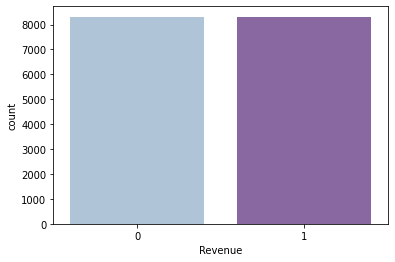

In [12]:
import seaborn as sns
sns.countplot(train_full['Revenue'], palette='BuPu')

This is a balanced dataset

In [13]:
import matplotlib.pyplot as plt

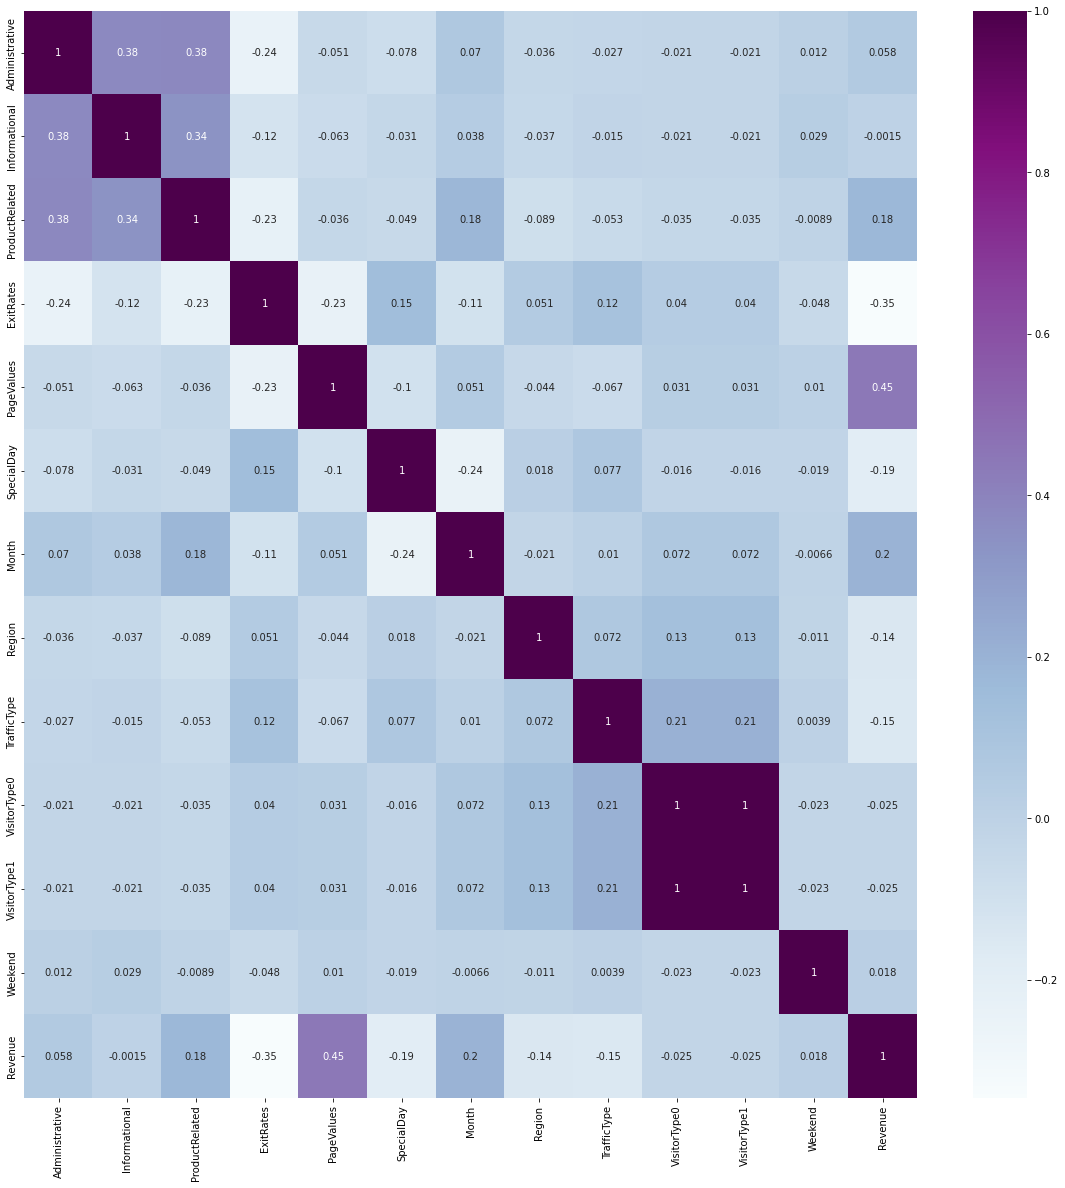

In [14]:
plt.figure(figsize = (20,20))
g = sns.heatmap(train_full.corr(),annot=True, cmap = 'BuPu')

Comment: Revenue has maximum correlation with PageValues


In [15]:
X_train_full = train_full.iloc[:,:-1]
y_train_full = train_full.iloc[:,-1]

In [16]:
X_train_full.shape

(16626, 12)

In [17]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [18]:
X_train_full.head()

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType0,VisitorType1,Weekend
0,0,0,12,0.069444,0.000000,0.8,5,2,2,0,0,0
1,0,0,44,0.032143,0.000000,0.0,12,1,1,0,0,0
2,2,0,7,0.011111,0.000000,0.0,3,8,2,0,0,0
3,3,0,37,0.004274,47.931282,0.0,5,3,2,0,0,1
4,0,0,1,0.200000,0.000000,0.0,5,3,3,0,0,1


In [19]:
y_train_full.head()

0    0
1    0
2    0
3    1
4    0
Name: Revenue, dtype: int64

In [20]:
y_train_full.shape

(16626,)

In [21]:
import tensorflow as tf

In [22]:
tf.__version__

'2.6.0'

In [23]:
import keras

In [24]:
keras.__version__

'2.6.0'

## One Hot Encode Target Variable For Classification

#### This is necessary if we have multiclass target variable . (with classes more than 2)
However, if there are only 2 classes, it is not necessary to convert teh target variable to categorical. In such a case use binarycross entropy while compiling.

# Unlike in Lab 2b, which has dtype of float32, here the dtype is int. As seen in the arrays below, there is no decimal.

In [25]:
y_tra_full = tf.keras.utils.to_categorical(y_train_full, num_classes=None, dtype="int")

In [26]:
y_tra_full.shape

(16626, 2)

In [27]:
y_tra_full[0:5]

array([[1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0]])

In [28]:
y_tes =  tf.keras.utils.to_categorical(y_test, num_classes=None, dtype="int")

In [29]:
y_tes

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

### Create a baseline model 

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [31]:
def create_baseline():
    #Initializing Neural Network. classifier is an instance of the Sequential class
    classifier = Sequential()

    ##Defining the architecture of ANN
   
    # First layer 
    classifier.add(Dense(units = 512, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 12))
    
    
    # Second layer
    classifier.add(Dense(units= 128 , kernel_initializer = 'he_uniform', activation = 'relu'))
    
    classifier.add(Dense(units= 96, kernel_initializer = 'he_uniform', activation = 'relu'))
    # Adding the output layer
    classifier.add(Dense(units = 2, kernel_initializer = 'he_uniform', activation = 'softmax'))
    
   
    # Compiling Neural Network
    ## specifying optimizer 
    ## This is the metaparameter, specfiying the metaparameter , (adam is popular optimizer like SGD, and GD, 
    ## the binary_corssentropy is because it has 2 class)
    
    return classifier



As explained in lab 2b, ReLU is more computationally efficient and has constant gradient which helps against vanishing gradient. As for softmax, it is used in output layers to show probabilities of each class. The parameters used in classifier.add() are same as those in lab 2a.

In [32]:
model = create_baseline()
print(model.summary())
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 194       
Total params: 84,898
Trainable params: 84,898
Non-trainable params: 0
_________________________________________________________________
None


Therefore, the number of weights are the same as those in lab 2b.

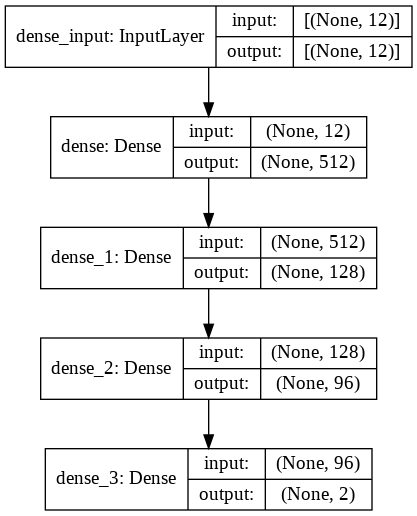

In [33]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

This diagram is not found in lab 2b. Basically, it presents model.summary in a picture format.

Note: The following model fit uses internal validation split of 20%. In this the last 20% of the rows are used for validation

# This split is where lab 2a and 2b actually differs. Because here the validation dataset is taken from the final rows.

In [34]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model compile sets the training configurations. categorical_crossentropy is chosen because it uses softmax under the hood and softmax activation is used in the output layer. Adam is derived from adaptive moment estimation is more efficient than other stochastic optimization methods. It also comes with hypterparameter tuning.

In [35]:
# model.fit(X_train_full,y_tra_full, validation_split=0.2, epochs=50)

In [36]:
history = model.fit(X_train_full, y_tra_full, validation_split=0.2, epochs = 50,  batch_size = 32, verbose = 2)
         

Epoch 1/50
416/416 - 2s - loss: 1.4070 - accuracy: 0.7903 - val_loss: 0.2028 - val_accuracy: 0.8960
Epoch 2/50
416/416 - 1s - loss: 0.4978 - accuracy: 0.8261 - val_loss: 1.1818 - val_accuracy: 0.6236
Epoch 3/50
416/416 - 1s - loss: 0.4264 - accuracy: 0.8372 - val_loss: 0.6317 - val_accuracy: 0.6603
Epoch 4/50
416/416 - 1s - loss: 0.4099 - accuracy: 0.8386 - val_loss: 0.4515 - val_accuracy: 0.7844
Epoch 5/50
416/416 - 1s - loss: 0.3835 - accuracy: 0.8462 - val_loss: 0.3258 - val_accuracy: 0.8599
Epoch 6/50
416/416 - 1s - loss: 0.3882 - accuracy: 0.8468 - val_loss: 0.4751 - val_accuracy: 0.7826
Epoch 7/50
416/416 - 1s - loss: 0.3691 - accuracy: 0.8517 - val_loss: 0.4337 - val_accuracy: 0.8334
Epoch 8/50
416/416 - 1s - loss: 0.3629 - accuracy: 0.8544 - val_loss: 0.4724 - val_accuracy: 0.7850
Epoch 9/50
416/416 - 1s - loss: 0.3630 - accuracy: 0.8533 - val_loss: 0.3677 - val_accuracy: 0.8512
Epoch 10/50
416/416 - 1s - loss: 0.3529 - accuracy: 0.8545 - val_loss: 0.2918 - val_accuracy: 0.8797

In [37]:

import pandas as pd
import matplotlib.pyplot as plt

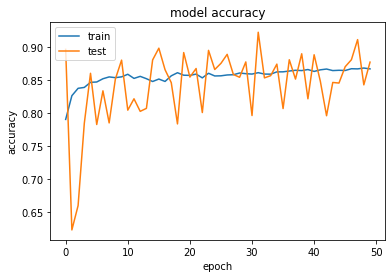

In [38]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Similar to in lab 2b, accuracy wouldn't increase much with more epochs, as seen in later epochs. However, based on the y-axis, the accuracy here is higher than in lab 2b.

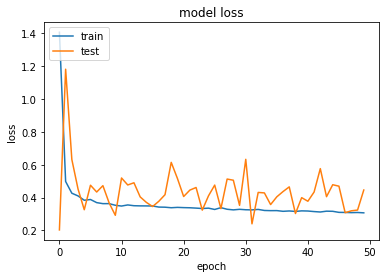

In [39]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The train loss is also around 0.4 at later epochs, similar to in lab 2b. However, the train and test losses have a much bigger difference. In fact, the test loss is higher.

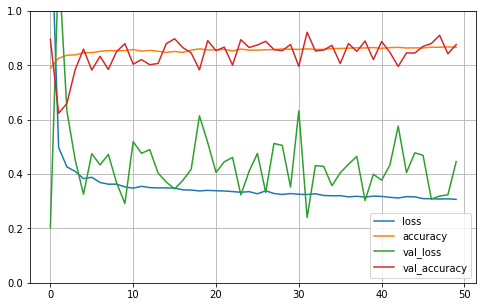

In [40]:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

 ## Task


Experiment with other architectures by increasing or decreasing layers, changing the number of neourons in each layer, batch size etc,
Comment on fitness, Summarise and critically analyse results.


Refer to this on validation split: https://datascience.stackexchange.com/questions/38955/how-does-the-validation-split-parameter-of-keras-fit-function-work


# Experiment 1: Adam optimizer and categorical_crossentropy from lab 2a + sklearn train_test_split from lab 2b

In [41]:
from sklearn.model_selection import train_test_split
train, valid = train_test_split (train_full, test_size = 0.2, random_state = 0)

In [42]:
train.shape

(13300, 13)

In [43]:
valid.shape

(3326, 13)

In [44]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]

In [45]:
X_valid = valid.iloc[:,:-1]
y_valid = valid.iloc[:,-1]

In [46]:
train.shape

(13300, 13)

In [47]:
valid.shape

(3326, 13)

In [48]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [49]:
history = model.fit(X_train_full, y_tra_full, validation_split=0.2, epochs = 50,  batch_size = 32, verbose = 2)

Epoch 1/50
416/416 - 2s - loss: 0.3102 - accuracy: 0.8664 - val_loss: 0.4623 - val_accuracy: 0.8100
Epoch 2/50
416/416 - 1s - loss: 0.3096 - accuracy: 0.8669 - val_loss: 0.4074 - val_accuracy: 0.8322
Epoch 3/50
416/416 - 1s - loss: 0.3050 - accuracy: 0.8695 - val_loss: 0.3315 - val_accuracy: 0.8891
Epoch 4/50
416/416 - 1s - loss: 0.3067 - accuracy: 0.8657 - val_loss: 0.2751 - val_accuracy: 0.8716
Epoch 5/50
416/416 - 1s - loss: 0.3080 - accuracy: 0.8675 - val_loss: 0.4025 - val_accuracy: 0.8560
Epoch 6/50
416/416 - 1s - loss: 0.3063 - accuracy: 0.8680 - val_loss: 0.3735 - val_accuracy: 0.8873
Epoch 7/50
416/416 - 1s - loss: 0.3047 - accuracy: 0.8677 - val_loss: 0.4960 - val_accuracy: 0.8352
Epoch 8/50
416/416 - 1s - loss: 0.3071 - accuracy: 0.8699 - val_loss: 0.3360 - val_accuracy: 0.8605
Epoch 9/50
416/416 - 1s - loss: 0.3024 - accuracy: 0.8699 - val_loss: 0.3917 - val_accuracy: 0.8169
Epoch 10/50
416/416 - 1s - loss: 0.3024 - accuracy: 0.8689 - val_loss: 0.4132 - val_accuracy: 0.8133

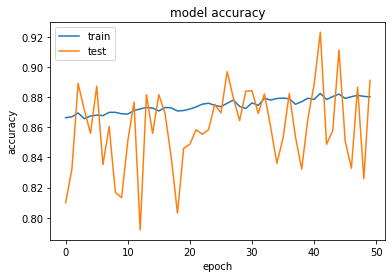

In [50]:
# summarize history for accuracy
def plot_acc():
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

plot_acc()

From the y-axis, the range is a lot smaller compared to that in lab 2a. Test accuracy has increased.

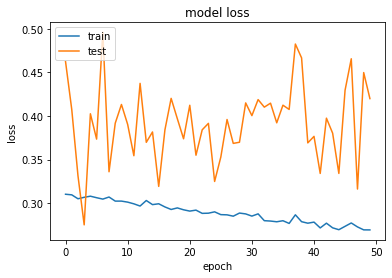

In [51]:
# summarize history for loss
def plot_lost():
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

plot_lost()

From the y-axis, the range is a lot smaller compared to that in lab 2a. Test loss has increased.

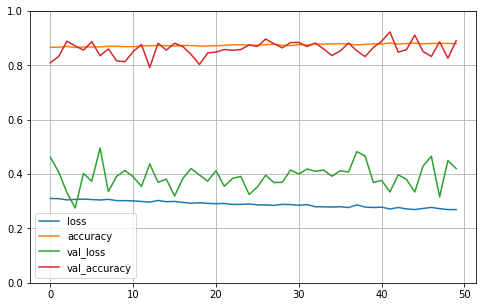

In [52]:
def plot_overall():
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.show()

plot_overall()

Compared to lab 2b, both loss and accuracy are higher in this experiment

# Experiment 2: Increasing number of epoch in experiment 1

In [ ]:
history = model.fit(X_train_full, y_tra_full, validation_split=0.2, epochs = 100,  batch_size = 32, verbose = 2)

Epoch 1/100
416/416 - 1s - loss: 0.2719 - accuracy: 0.8814 - val_loss: 0.3488 - val_accuracy: 0.8978
Epoch 2/100
416/416 - 1s - loss: 0.2709 - accuracy: 0.8811 - val_loss: 0.4267 - val_accuracy: 0.8340
Epoch 3/100
416/416 - 1s - loss: 0.2673 - accuracy: 0.8820 - val_loss: 0.3687 - val_accuracy: 0.8821
Epoch 4/100
416/416 - 1s - loss: 0.2738 - accuracy: 0.8798 - val_loss: 0.4523 - val_accuracy: 0.8488
Epoch 5/100
416/416 - 1s - loss: 0.2740 - accuracy: 0.8786 - val_loss: 0.3510 - val_accuracy: 0.8542
Epoch 6/100
416/416 - 1s - loss: 0.2683 - accuracy: 0.8819 - val_loss: 0.3425 - val_accuracy: 0.8984
Epoch 7/100
416/416 - 1s - loss: 0.2682 - accuracy: 0.8821 - val_loss: 0.3482 - val_accuracy: 0.8939
Epoch 8/100
416/416 - 1s - loss: 0.2658 - accuracy: 0.8819 - val_loss: 0.4738 - val_accuracy: 0.8301
Epoch 9/100
416/416 - 1s - loss: 0.2745 - accuracy: 0.8790 - val_loss: 0.3435 - val_accuracy: 0.8731
Epoch 10/100
416/416 - 1s - loss: 0.2698 - accuracy: 0.8804 - val_loss: 0.3645 - val_accura

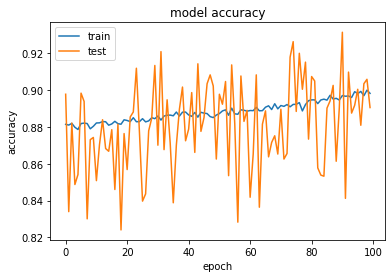

In [ ]:
plot_acc()

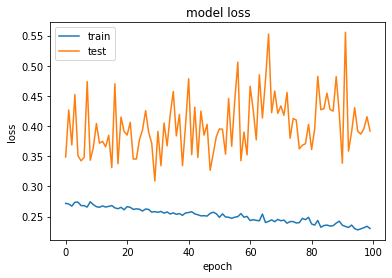

In [ ]:
plot_lost()

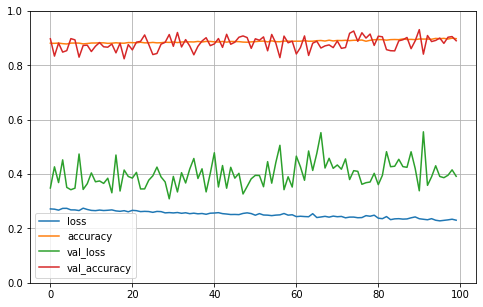

In [ ]:
plot_overall()

Doubling the epochs only seemed to reduce loss of experiment 1

# Experiment 3: Removing a layer from experiment 1

In [53]:
def create_exp3():
    #Initializing Neural Network. classifier is an instance of the Sequential class
    classifier = Sequential()

    ##Defining the architecture of ANN
   
    # First layer 
    classifier.add(Dense(units = 512, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 12))
    
    
    # Second layer
    classifier.add(Dense(units= 128 , kernel_initializer = 'he_uniform', activation = 'relu'))
    
    # classifier.add(Dense(units= 96, kernel_initializer = 'he_uniform', activation = 'relu'))
    # Adding the output layer
    classifier.add(Dense(units = 2, kernel_initializer = 'he_uniform', activation = 'softmax'))
    
   
    # Compiling Neural Network
    ## specifying optimizer 
    ## This is the metaparameter, specfiying the metaparameter , (adam is popular optimizer like SGD, and GD, 
    ## the binary_corssentropy is because it has 2 class)
    
    return classifier

In [54]:
model = create_exp3()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               6656      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 258       
Total params: 72,578
Trainable params: 72,578
Non-trainable params: 0
_________________________________________________________________
None


In [55]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [56]:
history = model.fit(X_train_full, y_tra_full, validation_split=0.2, epochs = 50,  batch_size = 32, verbose = 2)

Epoch 1/50
416/416 - 1s - loss: 1.1855 - accuracy: 0.7934 - val_loss: 0.4418 - val_accuracy: 0.7856
Epoch 2/50
416/416 - 1s - loss: 0.5790 - accuracy: 0.8254 - val_loss: 0.4198 - val_accuracy: 0.8250
Epoch 3/50
416/416 - 1s - loss: 0.5173 - accuracy: 0.8332 - val_loss: 0.4733 - val_accuracy: 0.7682
Epoch 4/50
416/416 - 1s - loss: 0.4518 - accuracy: 0.8390 - val_loss: 0.9217 - val_accuracy: 0.6293
Epoch 5/50
416/416 - 1s - loss: 0.4147 - accuracy: 0.8475 - val_loss: 0.3871 - val_accuracy: 0.8220
Epoch 6/50
416/416 - 1s - loss: 0.3813 - accuracy: 0.8502 - val_loss: 0.5233 - val_accuracy: 0.7453
Epoch 7/50
416/416 - 1s - loss: 0.3637 - accuracy: 0.8545 - val_loss: 0.3544 - val_accuracy: 0.8391
Epoch 8/50
416/416 - 1s - loss: 0.3927 - accuracy: 0.8511 - val_loss: 0.3634 - val_accuracy: 0.8521
Epoch 9/50
416/416 - 1s - loss: 0.3484 - accuracy: 0.8574 - val_loss: 0.2901 - val_accuracy: 0.8803
Epoch 10/50
416/416 - 1s - loss: 0.3501 - accuracy: 0.8574 - val_loss: 0.2954 - val_accuracy: 0.8719

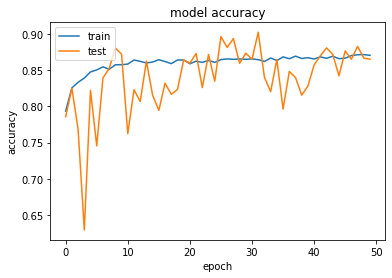

In [57]:
plot_acc()

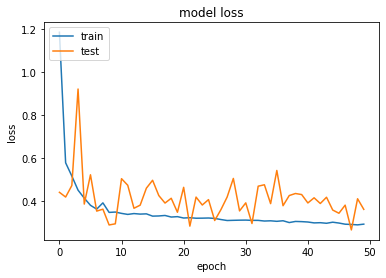

In [58]:
plot_lost()

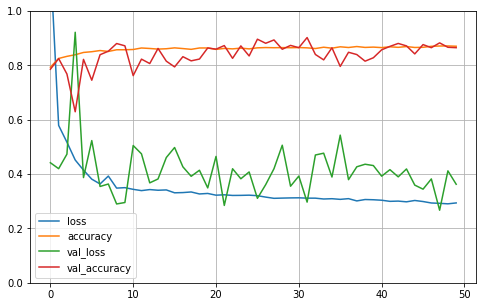

In [59]:
plot_overall()

Higher loss and lower accuracy than experiment 1

# Experiment 4: Increasing batch size in experiment 1

In [60]:
model = create_baseline()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               6656      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_9 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 194       
Total params: 84,898
Trainable params: 84,898
Non-trainable params: 0
_________________________________________________________________
None


In [61]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [62]:
history = model.fit(X_train_full, y_tra_full, validation_split=0.2, epochs = 50,  batch_size = 64, verbose = 2)

Epoch 1/50
208/208 - 1s - loss: 1.3052 - accuracy: 0.7988 - val_loss: 2.6261 - val_accuracy: 0.5250
Epoch 2/50
208/208 - 1s - loss: 0.5353 - accuracy: 0.8255 - val_loss: 1.4666 - val_accuracy: 0.4233
Epoch 3/50
208/208 - 1s - loss: 0.4742 - accuracy: 0.8338 - val_loss: 0.8600 - val_accuracy: 0.5704
Epoch 4/50
208/208 - 1s - loss: 0.4373 - accuracy: 0.8392 - val_loss: 0.3981 - val_accuracy: 0.8346
Epoch 5/50
208/208 - 1s - loss: 0.4004 - accuracy: 0.8470 - val_loss: 0.3523 - val_accuracy: 0.8425
Epoch 6/50
208/208 - 1s - loss: 0.3798 - accuracy: 0.8491 - val_loss: 0.4066 - val_accuracy: 0.8428
Epoch 7/50
208/208 - 1s - loss: 0.3687 - accuracy: 0.8524 - val_loss: 0.5838 - val_accuracy: 0.6828
Epoch 8/50
208/208 - 1s - loss: 0.3565 - accuracy: 0.8525 - val_loss: 0.3798 - val_accuracy: 0.8410
Epoch 9/50
208/208 - 1s - loss: 0.3574 - accuracy: 0.8526 - val_loss: 0.4937 - val_accuracy: 0.7748
Epoch 10/50
208/208 - 1s - loss: 0.3562 - accuracy: 0.8537 - val_loss: 0.5080 - val_accuracy: 0.8070

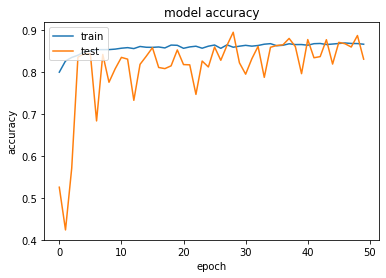

In [63]:
plot_acc()

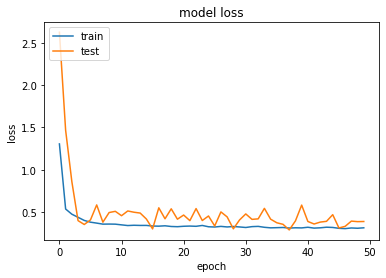

In [64]:
plot_lost()

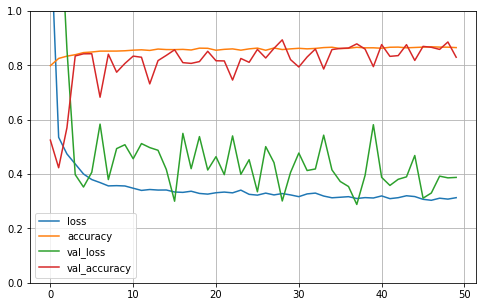

In [65]:
plot_overall()

Doubling the epochs increases the loss compared to in experiment 1

# Experiment 5: Increasing number of neurons in each layer of experiment 1

Since the original number of neurones in the ReLU are all divisible by 16, increase each layer's neuron by 16

In [71]:
def create_exp5():
    #Initializing Neural Network. classifier is an instance of the Sequential class
    classifier = Sequential()

    ##Defining the architecture of ANN
   
    # First layer 
    classifier.add(Dense(units = 528, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 12))
    
    
    # Second layer
    classifier.add(Dense(units= 128 , kernel_initializer = 'he_uniform', activation = 'relu'))
    
    classifier.add(Dense(units= 112, kernel_initializer = 'he_uniform', activation = 'relu'))
    # Adding the output layer
    classifier.add(Dense(units = 2, kernel_initializer = 'he_uniform', activation = 'softmax'))
    
   
    # Compiling Neural Network
    ## specifying optimizer 
    ## This is the metaparameter, specfiying the metaparameter , (adam is popular optimizer like SGD, and GD, 
    ## the binary_corssentropy is because it has 2 class)
    
    return classifier

In [72]:
model = create_exp5()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 528)               6864      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               67712     
_________________________________________________________________
dense_17 (Dense)             (None, 112)               14448     
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 226       
Total params: 89,250
Trainable params: 89,250
Non-trainable params: 0
_________________________________________________________________
None


In [73]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [74]:
history = model.fit(X_train_full, y_tra_full, validation_split=0.2, epochs = 50,  batch_size = 32, verbose = 2)

Epoch 1/50
416/416 - 2s - loss: 1.1502 - accuracy: 0.7941 - val_loss: 0.2348 - val_accuracy: 0.8848
Epoch 2/50
416/416 - 1s - loss: 0.5170 - accuracy: 0.8268 - val_loss: 0.4288 - val_accuracy: 0.8142
Epoch 3/50
416/416 - 1s - loss: 0.4268 - accuracy: 0.8383 - val_loss: 0.5765 - val_accuracy: 0.7126
Epoch 4/50
416/416 - 1s - loss: 0.3863 - accuracy: 0.8450 - val_loss: 0.4005 - val_accuracy: 0.8400
Epoch 5/50
416/416 - 1s - loss: 0.3764 - accuracy: 0.8477 - val_loss: 0.6670 - val_accuracy: 0.8016
Epoch 6/50
416/416 - 1s - loss: 0.3703 - accuracy: 0.8471 - val_loss: 0.5552 - val_accuracy: 0.7829
Epoch 7/50
416/416 - 1s - loss: 0.3607 - accuracy: 0.8538 - val_loss: 0.2181 - val_accuracy: 0.9257
Epoch 8/50
416/416 - 1s - loss: 0.3525 - accuracy: 0.8566 - val_loss: 0.4715 - val_accuracy: 0.7517
Epoch 9/50
416/416 - 1s - loss: 0.3480 - accuracy: 0.8568 - val_loss: 0.4026 - val_accuracy: 0.8686
Epoch 10/50
416/416 - 1s - loss: 0.3484 - accuracy: 0.8547 - val_loss: 0.3460 - val_accuracy: 0.8629

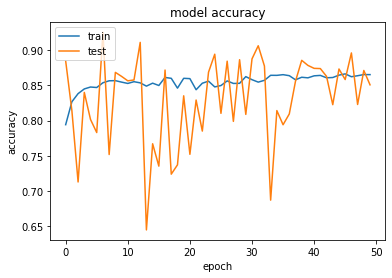

In [75]:
plot_acc()

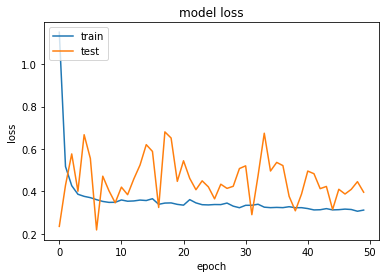

In [76]:
plot_lost()

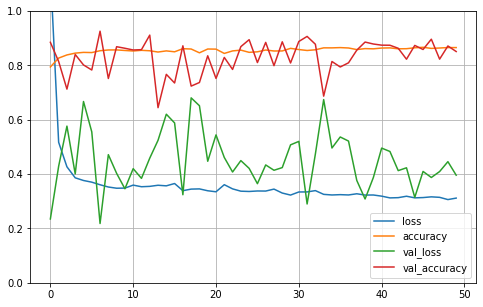

In [77]:
plot_overall()

Increasing number of neurons in each layer in experiment 1 actually increases loss significantly.

# Conclusion

Experiment 1 outperformed both lab2a and 2b. In the subsequent 4 experiments, only one parameter is changed and everything is held constant. However, experiment 1 still has the best performance, in terms of loss and accuracy.